## Data Set Description
* **Encounter ID**	Unique identifier of an encounter
* **Patient number**	Unique identifier of a patient
* **Race**	Values: Caucasian, Asian, African American, Hispanic, and other
* **Gender**	Values: male, female, and unknown/invalid
* **Age**	Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
* **Weight**	Weight in pounds
* **Admission type**	Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* **Discharge disposition**	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* **Admission source**	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* **Time in hospital**	Integer number of days between admission and discharge
* **Payer code**	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* **Medical specialty**	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* **Number of lab procedures**	Number of lab tests performed during the encounter
* **Number of procedures** Numeric	Number of procedures (other than lab tests) performed during the encounter
* **Number of medications**	Number of distinct generic names administered during the encounter
* **Number of outpatient visits** Number of outpatient visits of the patient in the year preceding the encounter
* **Number of emergency visits**	Number of emergency visits of the patient in the year preceding the encounter
* **Number of inpatient visits**	Number of inpatient visits of the patient in the year preceding the encounter
* **Diagnosis 1**	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* **Diagnosis 2**	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* **Diagnosis 3** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* **Number of diagnoses**	Number of diagnoses entered to the system 0%
* **Glucose serum test result**	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* **A1c test result**	Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* **Change of medications**	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* **Diabetes medications**	Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
* 24 features for medications	For the generic names: **metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone**, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* **Readmitted**	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
# importing sklearn Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import scikitplot as skplt
#Evalution Metrix
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,classification_report, roc_curve, confusion_matrix

In [30]:
df = pd.read_csv("C:/Users/91899/Desktop/Project 2/Feature_Selection.csv")
pd.set_option('display.max_columns', None)
df.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,No_of_Visit,gender,max_glu_serum,A1Cresult,metformin,repaglinide,glipizide,pioglitazone,acarbose,miglitol,insulin,change,diabetesMed,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,admission_type_id_Elective,admission_type_id_Others,discharge_disposition_id_Discharged,discharge_disposition_id_Others,discharge_disposition_id_Transfer,admission_source_id_Emergency Room,admission_source_id_Referral,admission_source_id_Transfer,diag_1_Circulatory,diag_1_Diabetes,diag_1_Genitourinary,diag_1_Musculoskeletal,diag_1_Neoplasms,diag_1_Respiratory,diag_2_Circulatory,diag_2_Diabetes,diag_2_Digestive,diag_2_Injury,diag_2_Musculoskeletal,diag_3_Circulatory,diag_3_Diabetes,diag_3_Genitourinary,diag_3_Injury,diag_3_Respiratory,readmitted
0,0.000000,0.262650,0.105263,0.912871,0.137931,0.0,0.931709,0.230769,1,1,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0.142857,0.262650,0.452632,0.408248,0.000000,0.0,0.000000,0.288462,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.285714,0.000000,0.526316,0.000000,0.000000,0.0,0.000000,0.134615,1,0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0.428571,0.416290,0.315789,1.000000,0.000000,0.0,0.000000,0.288462,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,0.571429,0.525299,0.726316,0.408248,0.000000,0.0,0.000000,0.384615,1,0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [31]:
X = df.drop('readmitted', axis = 1)
y = df['readmitted']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 49)

### Logistic Regression

In [5]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train,y_train)
LR_PRED = LR.predict(X_test) #Confusion matrix & Classification Report
LR_PRED_PROB = LR.predict_proba(X_test)[:,1] #ROC Curve
print('\nLogistic Regression:\n',LR.score(X_train, y_train),LR.score(X_test, y_test))
print('\nConfusion Matrix: \n',confusion_matrix(y_test,LR_PRED))
print('\nClassification Report: \n',classification_report(y_test,LR_PRED))


Logistic Regression:
 0.8314108616230861 0.8317130405631914

Confusion Matrix: 
 [[12033   392]
 [ 3122  5334]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.97      0.87     12425
           1       0.93      0.63      0.75      8456

    accuracy                           0.83     20881
   macro avg       0.86      0.80      0.81     20881
weighted avg       0.85      0.83      0.82     20881



### Random Forest

In [33]:
RF = RandomForestClassifier(n_estimators= 1500, criterion='gini',max_depth=5,min_samples_split=4,min_samples_leaf=2,
     min_weight_fraction_leaf=0.0,max_features='auto', max_leaf_nodes=None,min_impurity_decrease=0.0,
     min_impurity_split=None,bootstrap=True)
RF.fit(X_train,y_train) 
RF_PRED = RF.predict(X_test) #Confusion matrix & Classification Report
RF_PRED_PROB = RF.predict_proba(X_test)[:,1] #ROC Curve
print('\nRandom Forest:\n',RF.score(X_train, y_train),RF.score(X_test, y_test))
print('\nConfusion Matrix: \n',confusion_matrix(y_test,RF_PRED))
print('\nClassification Report: \n',classification_report(y_test,RF_PRED))


Random Forest:
 0.830056237428677 0.8297974234950434

Confusion Matrix: 
 [[12191   234]
 [ 3320  5136]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.98      0.87     12425
           1       0.96      0.61      0.74      8456

    accuracy                           0.83     20881
   macro avg       0.87      0.79      0.81     20881
weighted avg       0.85      0.83      0.82     20881



In [34]:
s = pd.DataFrame({"Features": X.columns , "Importance":RF.feature_importances_}, index = None).sort_values(by = 'Importance', ascending = False).head(10)

In [35]:
s['Features']

8                         No_of_Visit
6                    number_emergency
5                   number_outpatient
4                     num_medications
1                    time_in_hospital
7                    number_inpatient
18                            insulin
2                  num_lab_procedures
11                          A1Cresult
29    discharge_disposition_id_Others
Name: Features, dtype: object

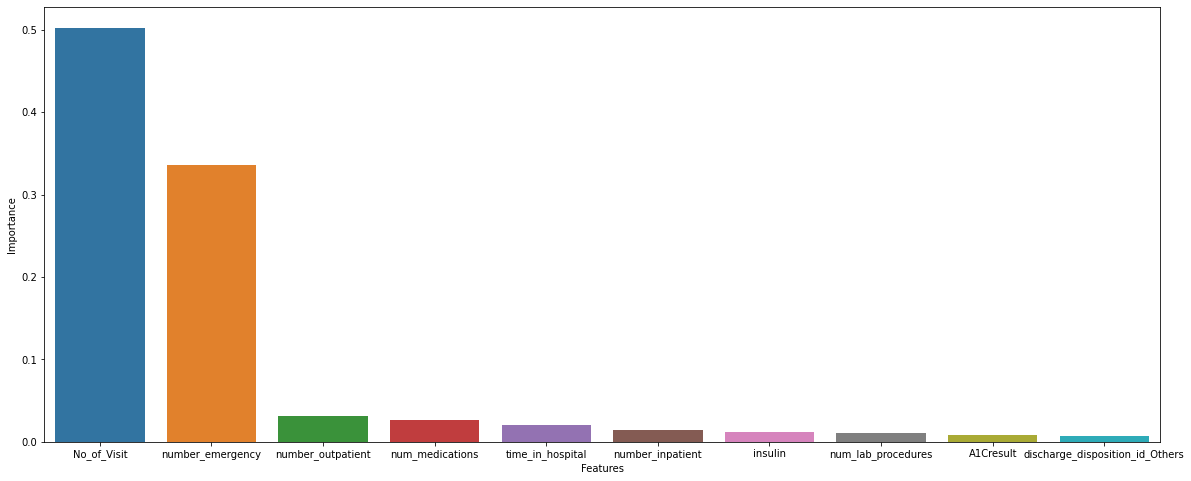

In [36]:
plt.figure(figsize =(20,8))
sns.barplot(s['Features'], s['Importance'])
plt.xticks(rotation = 0)
plt.show()

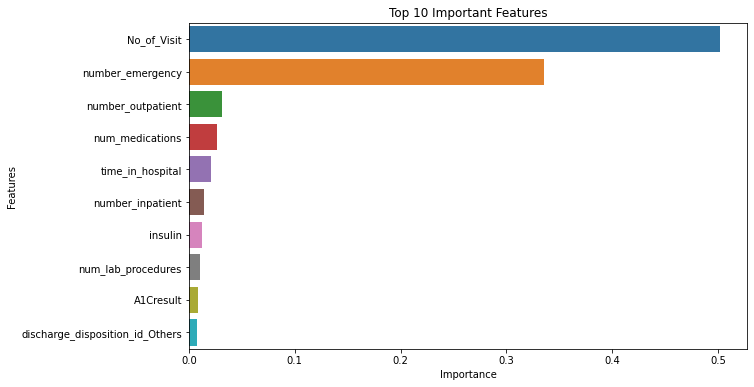

In [44]:
plt.figure(figsize =(10,6))
sns.barplot(s['Importance'], s['Features'])
plt.xticks(rotation = 0)
plt.title("Top 10 Important Features")
plt.show()

### Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train,y_train) 
NB_PRED = NB.predict(X_test) #Confusion matrix & Clssification Report
NB_PRED_PROB = NB.predict_proba(X_test)[:,1] #ROC Curve
print('\n Naive Bayes:\n',NB.score(X_train, y_train),NB.score(X_test, y_test))
print('\nConfusion Matrix: \n',confusion_matrix(y_test,NB_PRED))
print('\nClassification Report: \n',classification_report(y_test,NB_PRED))


 Naive Bayes:
 0.816099503304462 0.816675446578229

Confusion Matrix: 
 [[11249  1176]
 [ 2652  5804]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.91      0.85     12425
           1       0.83      0.69      0.75      8456

    accuracy                           0.82     20881
   macro avg       0.82      0.80      0.80     20881
weighted avg       0.82      0.82      0.81     20881



### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train) 
DT_PRED = DT.predict(X_test) #Confusion matrix & Clssification Report
DT_PRED_PROB = DT.predict_proba(X_test)[:,1] #ROC Curve
print('\nDecision Tree:\n',DT.score(X_train, y_train),DT.score(X_test, y_test))
print('\nConfusion Matrix: \n',confusion_matrix(y_test,DT_PRED))
print('\nClassification Report: \n',classification_report(y_test,DT_PRED))


Decision Tree:
 0.9999794753909939 0.7497725204731575

Confusion Matrix: 
 [[9630 2795]
 [2430 6026]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.78      0.79     12425
           1       0.68      0.71      0.70      8456

    accuracy                           0.75     20881
   macro avg       0.74      0.74      0.74     20881
weighted avg       0.75      0.75      0.75     20881



### XGBoost

In [25]:
from xgboost import XGBClassifier
XG = XGBClassifier(gamma= 4,learning_rate=0.1,max_depth=7)
XG.fit(X_train,y_train) 
XG_PRED = XG.predict(X_test) #Confusion matrix & Clssification Report
XG_PRED_PROB = XG.predict_proba(X_test)[:,1] #ROC Curve
print('\nExtreme Gradient Boosting Classifier:\n',XG.score(X_train, y_train),XG.score(X_test, y_test))
print('\nConfusion Matrix: \n',confusion_matrix(y_test,XG_PRED))
print('\nClassification Report: \n',classification_report(y_test,XG_PRED))


Extreme Gradient Boosting Classifier:
 0.8431098887566192 0.8360231789665246

Confusion Matrix: 
 [[11976   449]
 [ 2975  5481]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.96      0.87     12425
           1       0.92      0.65      0.76      8456

    accuracy                           0.84     20881
   macro avg       0.86      0.81      0.82     20881
weighted avg       0.85      0.84      0.83     20881



In [42]:
XG = XGBClassifier(learning_rate =0.1,n_estimators=944,max_depth=6,min_child_weight=1,gamma=9,subsample=0.8,
                   colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, seed=29)
XG.fit(X_train,y_train) 
XG_PRED = XG.predict(X_test) #Confusion matrix & Clssification Report
XG_PRED_PROB12 = XG.predict_proba(X_test)[:,1] #ROC Curve
print('\nExtreme Gradient Boosting Classifier:\n',XG.score(X_train, y_train),XG.score(X_test, y_test))
print('\nConfusion Matrix: \n',confusion_matrix(y_test,XG_PRED))
print('\nClassification Report: \n',classification_report(y_test,XG_PRED))


Extreme Gradient Boosting Classifier:
 0.8419194614342597 0.8362626311000431

Confusion Matrix: 
 [[11942   483]
 [ 2936  5520]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.96      0.87     12425
           1       0.92      0.65      0.76      8456

    accuracy                           0.84     20881
   macro avg       0.86      0.81      0.82     20881
weighted avg       0.85      0.84      0.83     20881



XGBoost:  0.8735314916937768


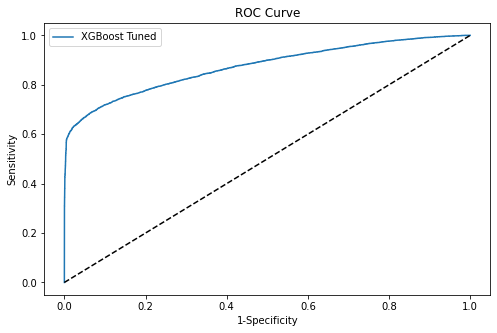

In [43]:
print('XGBoost: ',roc_auc_score(y_test,XG_PRED_PROB12))
plt.figure(figsize=(8,5))
fpr_RF, tpr_RF, th_RF = roc_curve(y_test, XG_PRED_PROB12)
plt.plot(fpr_RF, tpr_RF,label = 'XGBoost Tuned')
plt.plot([0,1],'k--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.legend()
plt.show()

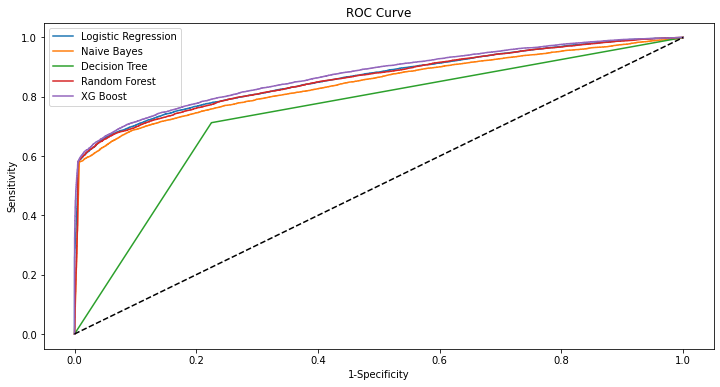

Logistic Regression:  0.8450140435803087
Naive Bayes        :  0.8602960716046516
Decision Tree      :  0.7438170651153847
Random Forest      :  0.8628653662752295
XG Boost           :  0.8736553664465506


In [26]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr_LR, tpr_LR, th_LR = roc_curve(y_test, LR_PRED_PROB)
fpr_NB, tpr_NB, th_NB = roc_curve(y_test, NB_PRED_PROB)
fpr_DT, tpr_DT, th_DT = roc_curve(y_test, DT_PRED_PROB)
fpr_RF, tpr_RF, th_RF = roc_curve(y_test, RF_PRED_PROB)
#fpr_ET, tpr_ET, th_ET = roc_curve(y_test, ET_PRED_PROB)
#fpr_BG, tpr_BG, th_BG = roc_curve(y_test, BG_PRED_PROB)
#fpr_ABC, tpr_ABC, th_ABC = roc_curve(y_test, ABC_PRED_PROB)
#fpr_GB, tpr_GB, th_GB = roc_curve(y_test, GB_PRED_PROB)
fpr_XG, tpr_XG, th_XG = roc_curve(y_test, XG_PRED_PROB)
#fpr_rf, tpr_rf, th_rf = roc_curve(y_test, RF_PRED_PROB1)
#fpr_xg, tpr_xg, th_xg = roc_curve(y_test, XG_PRED_PROB12)

plt.figure(figsize=(12,6))
plt.plot(fpr_LR, tpr_LR,label = 'Logistic Regression')
plt.plot(fpr_NB, tpr_NB,label = 'Naive Bayes')
plt.plot(fpr_DT, tpr_DT,label = 'Decision Tree')
plt.plot(fpr_RF, tpr_RF,label = 'Random Forest')
plt.plot(fpr_XG, tpr_XG,label = 'XG Boost')
#plt.plot(fpr_rf, tpr_rf,label = 'Tuned Rf')
#plt.plot(fpr_xg, tpr_xg,label = 'XG Boost Tuned')


plt.plot([0,1],'k--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.legend()
plt.show()
print('Logistic Regression: ',roc_auc_score(y_test,NB_PRED_PROB))
print('Naive Bayes        : ',roc_auc_score(y_test,RF_PRED_PROB))
print('Decision Tree      : ',roc_auc_score(y_test,DT_PRED_PROB))
print('Random Forest      : ',roc_auc_score(y_test,LR_PRED_PROB))
#print('Extra Tree         : ',roc_auc_score(y_test,LR_PRED_PROB))
#print('Bagging            : ',roc_auc_score(y_test,BG_PRED_PROB))
#print('Adaboost           : ',roc_auc_score(y_test,ABC_PRED_PROB))
#print('Gradient Boost     : ',roc_auc_score(y_test,GB_PRED_PROB))
print('XG Boost           : ',roc_auc_score(y_test,XG_PRED_PROB))
#print('RF tuned Boost     : ',roc_auc_score(y_test,RF_PRED_PROB1))
#print('XG tuned Boost     : ',roc_auc_score(y_test,XG_PRED_PROB12))

In [10]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in extra tree
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 40, num = 8)]
# Minimum number of samples required to split a node
min_samples_split = [2,3,4, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4, 5, 10]

In [11]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [12]:
rf = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=0, 
                        random_state=42, n_jobs = 1)

In [13]:
rf.fit(X_train, y_train)
rf.best_params_

{'n_estimators': 944,
 'min_samples_split': 100,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 25}

In [14]:
RF1 = RandomForestClassifier(n_estimators= 944,min_samples_split= 100, min_samples_leaf= 4,
                             max_features= 'sqrt',max_depth= 25)
RF1.fit(X_train,y_train) 
RF_PRED1 = RF1.predict(X_test) #Confusion matrix & Clssification Report
RF_PRED_PROB1 = RF1.predict_proba(X_test)[:,1] #ROC Curve
print('\nRandom Forest:\n',RF1.score(X_train, y_train),RF1.score(X_test, y_test))
print('\nConfusion Matrix: \n',confusion_matrix(y_test,RF_PRED1))
print('\nClassification Report: \n',classification_report(y_test,RF_PRED1))


Random Forest:
 0.8434793317187308 0.835304822565969

Confusion Matrix: 
 [[12050   375]
 [ 3064  5392]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.97      0.88     12425
           1       0.93      0.64      0.76      8456

    accuracy                           0.84     20881
   macro avg       0.87      0.80      0.82     20881
weighted avg       0.85      0.84      0.83     20881



Random Forest:  0.8708147465683411


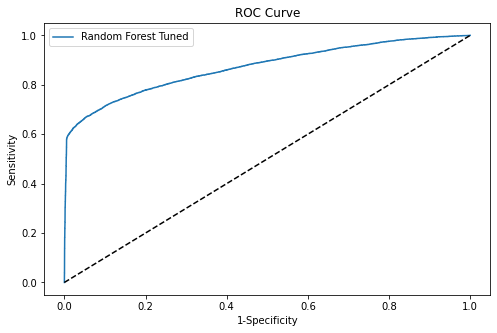

In [21]:
print('Random Forest: ',roc_auc_score(y_test,RF_PRED_PROB1))
plt.figure(figsize=(8,5))
fpr_RF, tpr_RF, th_RF = roc_curve(y_test, RF_PRED_PROB1)
plt.plot(fpr_RF, tpr_RF,label = 'Random Forest Tuned')
plt.plot([0,1],'k--')
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve')
plt.legend()
plt.show()